# DX 602 Week 11 Homework

## Introduction

In this homework, you will practice building models with scikit-learn, and review previous weeks' material.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Shared Imports

Do not install or use any additional modules.
Installing additional modules may result in an autograder failure resulting in zero points for some or all problems.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.ensemble
import sklearn.linear_model
import sklearn.svm

## Shared Data

### Titanic

See https://github.com/EpistasisLab/pmlb/blob/master/datasets/titanic/metadata.yaml for information about these columns.

In [3]:
titanic = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/872ec0a1f99ca0b55a8c8c5491da09a7da66ce13/datasets/titanic/titanic.tsv.gz", sep="\t")
titanic = titanic.dropna()
titanic.head()

,gender,age,class,embarked,country,fare,sibsp,parch,target
0,0,42.0,0,0,1.0,7.11,0.0,0.0,0
1,0,13.0,0,0,1.0,20.05,0.0,2.0,0
2,0,16.0,0,0,1.0,20.05,1.0,1.0,0
3,1,39.0,0,0,0.0,20.05,1.0,1.0,1
4,1,16.0,0,0,8.0,7.13,0.0,0.0,1


In [4]:
len(titanic)

2099

In [5]:
titanic_inputs = titanic.drop("target", axis=1)
titanic_inputs.head()

,gender,age,class,embarked,country,fare,sibsp,parch
0,0,42.0,0,0,1.0,7.11,0.0,0.0
1,0,13.0,0,0,1.0,20.05,0.0,2.0
2,0,16.0,0,0,1.0,20.05,1.0,1.0
3,1,39.0,0,0,0.0,20.05,1.0,1.0
4,1,16.0,0,0,8.0,7.13,0.0,0.0


In [6]:
titanic_target = titanic["target"]
titanic_target.head()

0    0
1    0
2    0
3    1
4    1
Name: target, dtype: int64

## Problems

### Problem 1

Set `p1` to the type of `q1`.
The type is a specific object representing the type, not just a string name.

In [7]:
# DO NOT CHANGE

q1 = sklearn.linear_model.LinearRegression()

In [8]:
# YOUR CHANGES HERE

p1 = type(q1)

In [9]:
p1

sklearn.linear_model._base.LinearRegression

### Problem 2

Set `p2` to be a linear model trained on the Titanic data set.

In [77]:
# YOUR CHANGES HERE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
features = ['class', 'sex', 'age', 'sibsp', 'parch', 'fare']
X = titanic[features]
X['age'].fillna(X['age'].median(), inplace=True)
for col in X.select_dtypes(include='number').columns:
    X[col].fillna(X[col].median(), inplace=True)
X = pd.get_dummies(X, drop_first=True)
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
p2 = LogisticRegression(max_iter=1000)
p2.fit(X_train, y_train)
accuracy = p2.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.75


/tmp/ipykernel_2746/1334920956.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].median(), inplace=True)
/tmp/ipykernel_2746/1334920956.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].median(), inplace=True)
/tmp/ipykernel_2746/1334920956.py:10: FutureWarning: A value is trying to be set 

In [78]:
p2

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Problem 3

Set `p3` to be the class of `q3`.

In [16]:
# DO NOT CHANGE

q3 = sklearn.linear_model.LinearRegression(fit_intercept = False)

In [17]:
# YOUR CHANGES HERE

p3 = q3.__class__

In [18]:
p3

sklearn.linear_model._base.LinearRegression

### Problem 4

Set `p4` to be a LinearSVC model from scikit-learn that was trained on the Titanic inputs.

In [79]:
# YOUR CHANGES HERE

from sklearn.svm import LinearSVC
features = ['class', 'sex', 'age', 'sibsp', 'parch', 'fare']
X = titanic[features]
for col in X.select_dtypes(include='number').columns:
    X[col].fillna(X[col].median(), inplace=True)
X = pd.get_dummies(X, drop_first=True)
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
p4 = LinearSVC(max_iter=5000)
p4.fit(X_train, y_train)
accuracy = p4.score(X_test, y_test)
print(f"LinearSVC model accuracy: {accuracy:.2f}")

LinearSVC model accuracy: 0.74


/tmp/ipykernel_2746/1846105185.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
/tmp/ipykernel_2746/1846105185.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].median(), inplace=True)
/tmp/ipykernel_2746/1846105185.py:7: FutureWarning: A value is trying to be set on a copy

In [80]:
p4

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


### Problem 5

Set `p5` to be a ridge regression model from scikit-learn that was trained on the Titanic data set.

In [81]:
# YOUR CHANGES HERE

from sklearn.linear_model import Ridge
p5 = Ridge(alpha=1.0).fit(X_train, y_train)

In [82]:
p5

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


### Problem 6

Train a linear model on just the age column of the Titanic data set.
Set `p6` to be a list of predictions for each whole number age from 1 to 99 (inclusive).

In [83]:
# YOUR CHANGES HERE

from sklearn.linear_model import LinearRegression
X = titanic[['age']]
y = titanic['survived']
X['age'].fillna(X['age'].median(), inplace=True)
linear_model = LinearRegression().fit(X, y)
ages = np.arange(1, 100).reshape(-1, 1)
p6 = linear_model.predict(ages).tolist()

/tmp/ipykernel_2746/1228918952.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].median(), inplace=True)
/tmp/ipykernel_2746/1228918952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].median(), inplace=True)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2

In [84]:
p6

[0.48114008412242587,
 0.4785275432053669,
 0.47591500228830785,
 0.4733024613712489,
 0.47068992045418984,
 0.46807737953713086,
 0.4654648386200718,
 0.46285229770301284,
 0.4602397567859538,
 0.4576272158688948,
 0.4550146749518358,
 0.4524021340347768,
 0.44978959311771777,
 0.44717705220065873,
 0.44456451128359975,
 0.4419519703665407,
 0.43933942944948173,
 0.4367268885324227,
 0.4341143476153637,
 0.4315018066983047,
 0.4288892657812457,
 0.42627672486418666,
 0.4236641839471277,
 0.42105164303006865,
 0.4184391021130096,
 0.41582656119595063,
 0.41321402027889165,
 0.4106014793618326,
 0.4079889384447736,
 0.4053763975277146,
 0.40276385661065556,
 0.4001513156935966,
 0.39753877477653754,
 0.39492623385947856,
 0.3923136929424195,
 0.3897011520253605,
 0.3870886111083015,
 0.3844760701912425,
 0.3818635292741835,
 0.37925098835712445,
 0.37663844744006547,
 0.37402590652300644,
 0.37141336560594745,
 0.3688008246888884,
 0.36618828377182944,
 0.3635757428547704,
 0.3609632019

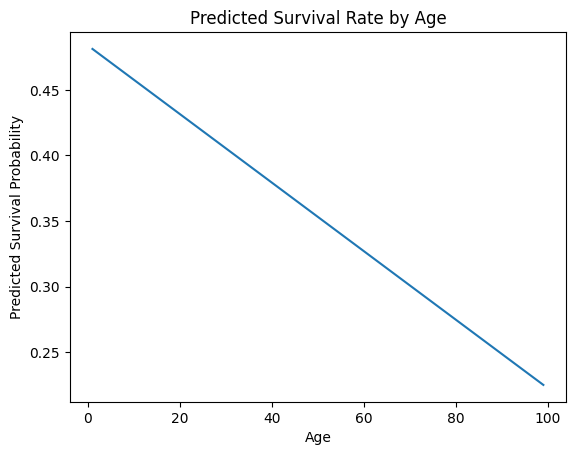

In [85]:
if p6 is not ...:
    plt.plot(range(1, 100), p6)
    plt.title("Predicted Survival Rate by Age")
    plt.xlabel("Age")
    plt.ylabel("Predicted Survival Probability")

### Problem 7

Set `p7` to be a random forest regression model from scikit-learn that was trained on the Titanic data set.
This model should use 7 trees with a maximum depth of 7.

In [86]:
# YOUR CHANGES HERE

from sklearn.ensemble import RandomForestRegressor
X = titanic[features]
for col in X.select_dtypes(include='number').columns:
    X[col].fillna(X[col].median(), inplace=True)
X = pd.get_dummies(X, drop_first=True)
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
p7 = RandomForestRegressor(n_estimators=7, max_depth=7, random_state=42)
p7.fit(X_train, y_train)

/tmp/ipykernel_2746/1077572351.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
/tmp/ipykernel_2746/1077572351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].median(), inplace=True)
/tmp/ipykernel_2746/1077572351.py:6: FutureWarning: A value is trying to be set on a copy

,n_estimators,7
,criterion,'squared_error'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [87]:
p7

,n_estimators,7
,criterion,'squared_error'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Problem 8

Set `p8` to be a random forest classification model from scikit-learn that was trained on the Titanic data set.
This model should use 7 trees with a maximum depth of 7.

Hint: Problems 7 and 8 are similar in that they use similar model classes to predict the same target column, but problem 7 treats the target as a number to approximate, while problem 8 treats the target as distinct classes (0 and 1) to model.

In [88]:
# YOUR CHANGES HERE

from sklearn.ensemble import RandomForestClassifier
p8 = RandomForestClassifier(n_estimators=7, max_depth=7, random_state=42).fit(X_train, y_train)

In [89]:
p8

,n_estimators,7
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Problem 9

The classifier model in `q9` was trained on the Titanic data set using age as an input.
Set `p9` to be the predicted probabilities from this model for someone 19 years old.

In [32]:
# DO NOT CHANGE

q9 = sklearn.ensemble.RandomForestClassifier(n_estimators=9)
q9.fit(titanic_inputs[["age"]], titanic_target)

,n_estimators,9
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
# YOUR CHANGES HERE

p9 = q9.predict_proba(np.array([[19]]))[0]

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [34]:
p9

array([0.74100089, 0.25899911])

### Problem 10

Set `p10` to the accuracy of the classifier model in `q10` on its training data set.

Hint: check the documentation for the model class to find a convenient method to compute the accuracy.

In [37]:
# DO NOT CHANGE

q10 = sklearn.ensemble.RandomForestClassifier()
q10.fit(titanic_inputs[["gender", "age", "class", "fare"]], titanic_target)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
# YOUR CHANGES HERE

p10 = q10.score(titanic_inputs[["gender", "age", "class", "fare"]], titanic_target)

In [39]:
p10

0.9118627918056217

### Problem 11

Set `p11` to $\log_3 11$.

In [40]:
# YOUR CHANGES HERE

p11 = math.log(11, 3)

In [41]:
p11

2.182658338644138

### Problem 12

Set `p12` to be a set of all the tuples `(x, y)` such that $x$ and $y$ are both integers and 
$-5 \leq x \leq 5$ and $-5 \leq y \leq 5$ and $\sqrt{x^2 + y^2} \leq 5$.

In [42]:
# YOUR CHANGES HERE

p12 = {(x, y) for x in range (-5, 6) for y in range (-5, 6) if math.sqrt(x**2 + y**2) <= 5}

In [43]:
p12

{(-5, 0),
 (-4, -3),
 (-4, -2),
 (-4, -1),
 (-4, 0),
 (-4, 1),
 (-4, 2),
 (-4, 3),
 (-3, -4),
 (-3, -3),
 (-3, -2),
 (-3, -1),
 (-3, 0),
 (-3, 1),
 (-3, 2),
 (-3, 3),
 (-3, 4),
 (-2, -4),
 (-2, -3),
 (-2, -2),
 (-2, -1),
 (-2, 0),
 (-2, 1),
 (-2, 2),
 (-2, 3),
 (-2, 4),
 (-1, -4),
 (-1, -3),
 (-1, -2),
 (-1, -1),
 (-1, 0),
 (-1, 1),
 (-1, 2),
 (-1, 3),
 (-1, 4),
 (0, -5),
 (0, -4),
 (0, -3),
 (0, -2),
 (0, -1),
 (0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, -4),
 (1, -3),
 (1, -2),
 (1, -1),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, -4),
 (2, -3),
 (2, -2),
 (2, -1),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, -4),
 (3, -3),
 (3, -2),
 (3, -1),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, -3),
 (4, -2),
 (4, -1),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (5, 0)}

### Problem 13

Fix the code below so that `p13` is a list of all the non-negative integers whose square is at most 200.
The list `p13` should be in sorted order.

In [46]:
# YOUR CHANGES HERE

p13 = [i for i in range(15) if i * i <= 200]

In [47]:
p13

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

### Problem 14

Parse the file `p14.txt` and return the result as an array.


Hint: this file is neither a CSV nor TSV. Take a look inside the file and adapt how you normally read files.

In [48]:
# YOUR CHANGES HERE

with open("p14.txt", "r") as f:
    lines = f.readlines()
p14 = [line.strip().split() for line in lines]
p14 = [item for sublist in p14 for item in sublist]

FileNotFoundError: [Errno 2] No such file or directory: 'p14.txt'

In [ ]:
p14

### Problem 15

The variable `q15` contains different integers.
Set `p15` to be a list of strings of the form "There are X lights!" where X is replaced by the corresponding integer in `q15`.
So the first entry of `p15` should be "There are 2 lights!".

In [49]:
# DO NOT CHANGE

q15 = [2, 3, 4, 5]

In [50]:
# YOUR CHANGES HERE

p15 = [f"There are {x} lights!" for x in q15]

In [51]:
p15

['There are 2 lights!',
 'There are 3 lights!',
 'There are 4 lights!',
 'There are 5 lights!']

### Problem 16

The variable `q16` is an $10 \times 5$ array with 10 rows and 5 columns.
Set `p16` to be an array with the 5 column-wise averages of `q16`.


In [52]:
# DO NOT CHANGE

q16 = np.array([[3.40864885, 3.68858828, 2.86057865, 3.01725228, 2.15426923],
       [1.34071108, 3.60970053, 3.09508975, 1.99181472, 3.72755944],
       [2.27462049, 3.60503433, 3.3379464 , 1.53294595, 2.53640698],
       [2.27993742, 4.40313456, 4.16207568, 3.1946614 , 3.31216085],
       [3.65895302, 2.82854211, 3.7869685 , 2.36177663, 5.23078867],
       [2.89513834, 6.62947413, 3.92238744, 1.93607107, 2.58668307],
       [4.11456866, 4.50028394, 1.35740397, 4.21809614, 4.86419447],
       [2.51069636, 3.27888949, 4.09008079, 4.87964695, 3.83210396],
       [3.12098515, 2.29402227, 1.92497904, 4.0012971 , 2.86927765],
       [2.48139499, 2.80928876, 3.06879789, 2.13957376, 4.30533335]])

In [53]:
# YOUR CHANGES HERE

p16 = np.mean(q16, axis=0)

In [54]:
p16

array([2.80856544, 3.76469584, 3.16063081, 2.9273136 , 3.54187777])

### Problem 17

Set `p17` to be a 1-dimensional view of `q17` with all the values in `q17` shown once.


In [90]:
# DO NOT CHANGE

q17 = np.array([[2, 3, 5], [7, 11, 13], [17, 19, 23]])

In [95]:
# YOUR CHANGES HERE

p17 = np.unique(q17, axis=0)

In [96]:
p17

array([[ 2,  3,  5],
       [ 7, 11, 13],
       [17, 19, 23]])

### Problem 18

Set `p18` to be a copy of the Titanic data set with just the gender, age, class, and target columns in that order.

In [59]:
# YOUR CHANGES HERE

p18 = titanic_inputs[["gender", "age", "class"]].copy()
p18["target"] = titanic_target

In [60]:
p18.head()

,gender,age,class,target
0,0,42.0,0,0
1,0,13.0,0,0
2,0,16.0,0,0
3,1,39.0,0,1
4,1,16.0,0,1


### Problem 19

Set `p19` to be a query string that can be used to filter the `titanic` data set to just women and children (younger than 18 years old).


In [97]:
# YOUR CHANGES HERE

p19 = "(sex == 'female') or (age < 18)"

In [98]:
titanic.query(p19) if p19 is not ... else None

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


In [101]:
# did women and children have higher survival rates?

titanic.query(p19)["survived"].mean() if p19 is not ... else None

np.float64(0.6896551724137931)

### Problem 20

Set `p20` to be a data frame of data that groups the `titanic` data set on the age and class functions.
The average value for the remaining columns should be shown, and an additional column `size` should be added with the number of matching rows.
Then sort `p20` by the `size` column descending.


In [107]:
# YOUR CHANGES HERE

numeric_cols = titanic.select_dtypes(include='number').columns.tolist()
p20 = titanic.groupby(['age', 'class']).agg(
    **{col: 'mean' for col in numeric_cols},
    size = ('survived', 'count')
).reset_index()
p20 = p20.sort_values('size', ascending=False)

/tmp/ipykernel_2746/29877716.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p20 = titanic.groupby(['age', 'class']).agg(


TypeError: Must provide 'func' or tuples of '(column, aggfunc).

In [69]:
p20

,age,class,survived,pclass,sibsp,parch,fare,adult_male,alone,size
0,22.0,Third,0.250000,3.0,0.050000,0.000000,7.988330,0.700000,0.950000,20
1,21.0,Third,0.117647,3.0,0.176471,0.117647,10.056124,0.764706,0.882353,17
2,18.0,Third,0.250000,3.0,0.375000,0.250000,10.356250,0.500000,0.562500,16
3,20.0,Third,0.200000,3.0,0.200000,0.066667,8.624173,0.866667,0.800000,15
4,19.0,Third,0.214286,3.0,0.071429,0.000000,7.894636,0.857143,0.928571,14
...,...,...,...,...,...,...,...,...,...,...
259,71.0,Third,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
260,74.0,Second,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
261,74.0,First,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
262,80.0,Second,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
